In [270]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,glob, json



### Load the data

#### loading the reach events file

## Choose Session option to view
- change session_option so you can toggle between sessions
- you need to add the info for the new session

In [272]:
root_path = r'G:\Grant\behavior_data\DLC_net' # change this to your root path where all the analysis folder live, i currently use is G:\Grant\behavior_data\DLC_net
root_folder = 'grant_reach10_swingDoor-christie-2025-04-21' # change this to your root folder for one specfic mouse (this should contain multiple sessions)

In [313]:
session_option = 'A'  # Choose between 'A' or 'B' for the session option

print("⚠️Make Sure To Change session_option⚠️")

⚠️Make Sure To Change session_option⚠️


In [314]:
main_path = rf'{root_path}\{root_folder}'
print(f'main_path: {main_path}')

###### mouse session option A
if session_option == 'A':
    mouse = 'reach10'
    session_date = '20250421'
    session_ID = 'session001'


###### mouse session option B'
if session_option == 'B':
    mouse = 'reach10'
    session_date = '20250424'
    session_ID = 'session001'


    ###### mouse session option B'
if session_option == 'C':
    print("⚠️Info for sesion C does not exist yet⚠️")
    mouse = 'reach10'
    session_date = ' '
    session_ID = ' '


main_path: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21


In [315]:
# Check mouse files being used
print('========================')
print('Session Option: ', session_option)
print('========================')
print('⚠️ Do you want to use the following files ⚠️')

print(f'✅ mouse: {mouse}' )
print(f'✅ session_date: {session_date}' )
print(f'✅ session_ID: {session_ID}' )

Session Option:  A
⚠️ Do you want to use the following files ⚠️
✅ mouse: reach10
✅ session_date: 20250421
✅ session_ID: session001


# ⚠️ Make a new session_option each session⚠️
- ✅   Need to update and add correct file path for each session

In [326]:

if session_option == 'A':
    # Set path_frontCam and path_sideCam for session A manually
    path_frontCam = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\christielab\session001\20250421_christielab_session001_frontCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv"
    path_sideCam = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\christielab\session001\20250421_christielab_session001_sideCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv"
    xlsx_file = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\20250421_christielab_session001_Grant_curate_20250421.xlsx"
    txt_file = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250424\christielab\session001\20250424_christielab_session001_events_shifted.txt"
    root_behavior_path = rf'{main_path}\videos\{session_date}\christielab\{session_ID}'
    save_plots_path = rf'{main_path}\analysis\trajectory_plotting\{session_date}\{session_ID}'
    manual_additions_savePath = rf"{main_path}\Grant_curate\manual_additions"

if session_option == 'B':
    # Set path_frontCam and path_sideCam for session B manually
    path_frontCam = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250424\christielab\session001\20250424_christielab_session001_frontCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv"
    path_sideCam = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250424\christielab\session001\20250424_christielab_session001_sideCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv"
    xlsx_file = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\20250424_christielab_session001_Grant_curate_20250421.xlsx"
    txt_file = r"G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250424\christielab\session001\20250424_christielab_session001_events_shifted.txt"
    root_behavior_path = rf'{main_path}\videos\{session_date}\christielab\{session_ID}'
    save_plots_path = rf'{main_path}\analysis\trajectory_plotting\{session_date}\{session_ID}'
    manual_additions_savePath = rf"{main_path}\Grant_curate\manual_additions"



In [327]:
# Check if the paths are valid
if not os.path.exists(path_frontCam):
    print(f"❌ Front camera path does not exist: {path_frontCam}")
if not os.path.exists(path_sideCam):
    print(f"❌ Side camera path does not exist: {path_sideCam}")
    # Check if the paths are valid
if not os.path.exists(xlsx_file):
    print(f"❌ xlsx_file does not exist: {xlsx_file}")
if not os.path.exists(txt_file):
    print(f"❌ txt_file does not exist: {txt_file}")

# Check if the paths do exist
if os.path.exists(path_frontCam):
    print(f"✅ Front camera path exists: {path_frontCam}")
if os.path.exists(path_sideCam):
    print(f"✅ Side camera path exists: {path_sideCam}")
# Check if the paths do exist
if os.path.exists(xlsx_file):
    print(f"✅ xlsx_file exists: {xlsx_file}")
if os.path.exists(txt_file):
    print(f"✅ xlsx_file exists: {txt_file}")


manual_additions_savePath = rf"{main_path}\Grant_curate\manual_additions"

if not os.path.exists(manual_additions_savePath):
    os.makedirs(manual_additions_savePath)
    print(f"✅ manual_additions Directory created: {manual_additions_savePath}")
else:
    print(f"✅ manual_additions Directory already exists: {manual_additions_savePath}")

✅ Front camera path exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\christielab\session001\20250421_christielab_session001_frontCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv
✅ Side camera path exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\christielab\session001\20250421_christielab_session001_sideCam-0000DLC_resnet50_grant_reach10Dec4shuffle1_1030000.csv
✅ xlsx_file exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\20250421_christielab_session001_Grant_curate_20250421.xlsx
✅ xlsx_file exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250424\christielab\session001\20250424_christielab_session001_events_shifted.txt
✅ manual_additions Directory already exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\manual_additions


In [328]:
#xlsx = pd.ExcelFile(r"E:\gradschool\jason_christe\second_year_2024\DLC_net\grant_swingDoor-christie-2024-09-04\grant_curate\20240831_christielab_session002_Grant_curate.xlsx")
xlsx = pd.ExcelFile(xlsx_file)
xlsx
df_curate = pd.read_excel(xlsx, 'Sheet1')

# Adding a new column with sequential numbers starting from 1
df_curate['reach_number'] = range(1, len(df_curate) + 1)
print(f'total number of reaches: {len(df_curate)}')
df_curate[0:5]

total number of reaches: 26


,reachInit,reachMax,reachEnd,stim,pellet_delivery,pellet_detected,T6000,T5000,behaviors,Consumed,reach_number
0,4406,4431,4449,0,4385,4308,4255,4388,grabbed,Y,1
1,6848,6859,6896,0,6580,6830,6582,6833,missed,N,2
2,6942,6955,6978,0,6580,6830,6582,6833,grabbed,Y,3
3,9281,9291,9301,0,8956,9261,8895,9263,dropped,N,4
4,13662,13681,13708,0,13630,13477,13422,13632,dropped,N,5


In [329]:
frontCam_events_txt = root_behavior_path + '\\' + session_date + '_christielab_' + session_ID + '_events.txt'
frontCam_timestamps = root_behavior_path + '\\' + session_date + '_christielab_' + session_ID + '_frontCam_timestamps.txt'
stim_frame_path = root_behavior_path + '\\' + session_date + '_christielab_' + session_ID + '_sideCam_timestamps.txt'

if not os.path.exists(frontCam_events_txt):
    print(f'❌ No frontCam events txt file found at {frontCam_events_txt}')
    raise FileNotFoundError("FrontCam events txt file not found")
if not os.path.exists(frontCam_timestamps):
    print(f'❌ No frontCam_timestamps file found at {frontCam_timestamps}')
    raise FileNotFoundError("FrontCam timestamps txt file not found")
if not os.path.exists(stim_frame_path):
    print(f'❌ No stim_frame_path file found at {stim_frame_path}')
    raise FileNotFoundError("Stimulus frame txt file not found")
else:
    print("✅ All Behavior files found")
    print(f"Front camera events txt file found: {frontCam_events_txt}")
    print(f"Front camera timestamps file found: {frontCam_timestamps}")
    print(f"Stimulus frame timestamps file found: {stim_frame_path}")

✅ All Behavior files found
Front camera events txt file found: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250421\christielab\session001\20250421_christielab_session001_events.txt
Front camera timestamps file found: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250421\christielab\session001\20250421_christielab_session001_frontCam_timestamps.txt
Stimulus frame timestamps file found: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\videos\20250421\christielab\session001\20250421_christielab_session001_sideCam_timestamps.txt


In [330]:
df_front = pd.read_csv(path_frontCam, header=[1,2])
df_2_front =  pd.read_csv(path_frontCam)
df_side = pd.read_csv(path_sideCam, header=[1,2])
df_2_side =  pd.read_csv(path_sideCam)

C:\Users\user\AppData\Local\Temp\ipykernel_38652\2375926578.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2_front =  pd.read_csv(path_frontCam)
C:\Users\user\AppData\Local\Temp\ipykernel_38652\2375926578.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2_side =  pd.read_csv(path_sideCam)


### Get the pellet locaion on reachinit frames 

In [331]:
# Assuming df_side and df_front are already loaded as DataFrames
data_side = df_side
data_front = df_front

reach_init = df_curate['reachInit'].values
pellet_x_front = data_front['Pellet'].loc[reach_init[0]]
pellet_y_front = data_front['Pellet'].loc[reach_init[0]]
pellet_x_side = data_side['Pellet'].loc[reach_init[0]]
pellet_y_side = data_side['Pellet'].loc[reach_init[0]]
pellet_x_front = pellet_x_front['x']
pellet_y_front = pellet_y_front['y']
pellet_x_side = pellet_x_side['x']
pellet_y_side = pellet_y_side['y']
pellet_x_front, pellet_y_front, pellet_x_side, pellet_y_side

(201.56195068359372, 106.16805267333984, 215.781494140625, 94.19686889648438)

### extract the x,y cooridinates for the paw 

In [322]:
# Assuming df_side and df_front are already loaded as DataFrames
data_side = df_side
data_front = df_front

# Extract the 'SdH_Flat' body part coordinates
x_side = data_side[('SdH_Flat', 'x')]
y_side = data_side[('SdH_Flat', 'y')]
x_front = data_front[('FtH_Reach', 'x')]
y_front = data_front[('FtH_Reach', 'y')]

# These pellet locations are assumed to be from a prior step
pellet_x_side = pellet_x_side
pellet_y_side = pellet_y_side
pellet_x_front = pellet_x_front  
pellet_y_front = pellet_y_front

## Extract T6000 from the front camera
- used to make sure reaches dont skip
- because sometimes a mouse will reach mulitple times in one reach event. and that second reach will get called reach 2, when in reality it should be reach 1.2

In [323]:
from collections import defaultdict
import time

# Initialize defaultdicts
data = defaultdict(list)

# Measure time for file processing
start_time = time.time()

# Open and read the file
with open(frontCam_events_txt, 'r') as file:
    lines = file.readlines()

# Parse the data
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        name, value = parts
        data[name].append(int(value))

print("File parsing completed in:", time.time() - start_time, "seconds")

# Access data directly
pellet_detected_frame = data['pellet_detected']
pellet_delivery_frame = data['pellet_delivery']
T5000_frame = data['T5000_played']
T6000_frame = data['T6000_played']

# Print summaries
print("Pellet Detected (First 5):", pellet_detected_frame[:5])
print("Total Detected Values:", len(pellet_detected_frame))
print("Pellet Delivery (First 5):", pellet_delivery_frame[:5])
print("Total Delivery Values:", len(pellet_delivery_frame))
print("T5000 Values (First 5):", T5000_frame[:5])
print("Total T5000 Values:", len(T5000_frame))
print("T6000 Values (First 5):", T6000_frame[:5])
print("Total T6000 Values:", len(T6000_frame))

# Divide each value by 150
pellet_detected_seconds = [v / 150 for v in pellet_detected_frame]
pellet_delivery_seconds = [v / 150 for v in pellet_delivery_frame]

print("\nPellet Detected (First 5 in Seconds):", pellet_detected_seconds[:5])
print("Pellet Delivery (First 5 in Seconds):", pellet_delivery_seconds[:5])

# Slow motion factor
slow_motion_factor = 4.994614744995619

pellet_delivery_slow_motion = [t * slow_motion_factor for t in pellet_delivery_seconds]
pellet_detected_slow_motion = [t * slow_motion_factor for t in pellet_detected_seconds]

print("\nPellet Detected Aligned to Slow Motion Video (First 5):", pellet_detected_slow_motion[:5])
print("Pellet Delivery Aligned to Slow Motion Video (First 5):", pellet_delivery_slow_motion[:5])

# Convert to minutes
detected_slowmo_minutes_array = [seconds / 60 for seconds in pellet_detected_slow_motion]
delivery_slowmo_minutes_array = [seconds / 60 for seconds in pellet_delivery_slow_motion]

print("\nPellet Detected (Slow Motion in Minutes - First 5):", detected_slowmo_minutes_array[:5])
print("Pellet Delivery (Slow Motion in Minutes - First 5):", delivery_slowmo_minutes_array[:5])


File parsing completed in: 0.007973670959472656 seconds
Pellet Detected (First 5): [1823, 4308, 6641, 8955, 13476]
Total Detected Values: 55
Pellet Delivery (First 5): [2203, 4385, 6830, 9260, 13629]
Total Delivery Values: 55
T5000 Values (First 5): [2205, 4388, 6832, 9262, 13631]
Total T5000 Values: 55
T6000 Values (First 5): [1768, 4255, 6581, 8894, 13421]
Total T6000 Values: 58

Pellet Detected (First 5 in Seconds): [12.153333333333334, 28.72, 44.27333333333333, 59.7, 89.84]
Pellet Delivery (First 5 in Seconds): [14.686666666666667, 29.233333333333334, 45.53333333333333, 61.733333333333334, 90.86]

Pellet Detected Aligned to Slow Motion Video (First 5): [60.70121786751343, 143.44533547627418, 221.12824347677272, 298.1785002762385, 448.71618869040645]
Pellet Delivery Aligned to Slow Motion Video (First 5): [73.354241888169, 146.0092377120386, 227.42145805546718, 308.33421692439623, 453.810695730302]

Pellet Detected (Slow Motion in Minutes - First 5): [1.011686964458557, 2.3907555912

In [324]:
df_curate_plotting = df_curate[:162]
df_curate_plotting

,reachInit,reachMax,reachEnd,stim,pellet_delivery,pellet_detected,T6000,T5000,behaviors,Consumed,reach_number
0,4406,4431,4449,0,4385,4308,4255,4388,grabbed,Y,1
1,6848,6859,6896,0,6580,6830,6582,6833,missed,N,2
2,6942,6955,6978,0,6580,6830,6582,6833,grabbed,Y,3
3,9281,9291,9301,0,8956,9261,8895,9263,dropped,N,4
4,13662,13681,13708,0,13630,13477,13422,13632,dropped,N,5
5,17663,17676,17693,0,17635,17259,17196,17637,missed,N,6
6,26080,26096,26109,0,26061,25798,25742,26063,missed,N,7
7,30087,30100,30110,0,30065,29915,29857,30067,dropped,N,8
8,35580,35590,35596,0,35558,35297,35240,35560,dropped,N,9
9,39878,39888,39901,0,39853,39776,39722,39855,dropped,N,10


### Creating a new .xlsx file that contains all reach events (T6000, T5000, pellet delivery, pellet detected)

In [325]:
import pandas as pd
import numpy as np

# Load existing curated xlsx
df_orig = pd.read_excel(xlsx_file)

# Normalize column names just in case
df_orig.columns = df_orig.columns.str.strip().str.lower()

# Load and parse txt as done earlier
events = []
current_event = {}
with open(txt_file, 'r') as f:
    for line in f:
        if line.strip():
            key, value = line.strip().split('\t')
            value = int(value)
            if key == 'T6000_played':
                if current_event:
                    events.append(current_event)
                current_event = {'t6000': value}
            elif key == 'pellet_detected':
                current_event['pellet_detected'] = value
            elif key == 'pellet_delivery':
                current_event['pellet_delivery'] = value
            elif key == 'T5000_played':
                current_event['t5000'] = value
if current_event:
    events.append(current_event)

events_df = pd.DataFrame(events)

# Find which T6000s are missing from original file
existing_t6000s = df_orig['t6000'].values
new_rows = events_df[~events_df['t6000'].isin(existing_t6000s)].copy()

# Fill in missing columns to match structure
new_rows['reachinit'] = np.nan
new_rows['reachmax'] = np.nan
new_rows['reachend'] = np.nan
new_rows['stim'] = 0
new_rows['behaviors'] = np.nan

# Reorder columns to match original file
new_rows = new_rows[['reachinit', 'reachmax', 'reachend', 'stim',
                     'pellet_delivery', 'pellet_detected', 't6000', 't5000', 'behaviors']]

# Combine and sort by T6000
combined = pd.concat([df_orig, new_rows], ignore_index=True)
combined = combined.sort_values(by='t6000').reset_index(drop=True)

# Save final file
save_file = f"{manual_additions_savePath}\{session_date}_{session_ID}_Grant_curate.csv"
print(f"✅ Saving final file to: {save_file}")
combined.to_csv(save_file, index=False)


print("✅ Final merged CSV saved: final_merged_behavior_table.csv")


✅ Saving final file to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\manual_additions\20250421_session001_Grant_curate.csv
✅ Final merged CSV saved: final_merged_behavior_table.csv


### simple single unit front and Side Cam 2D trajectory Plots
- CHANGE THE SAVE PATH at BOTTOM 
- this block of code will attempt to decide if a reach is within the same pellet delivery event or a different one. if there are three back to back reaches within one single pellet deleviry the reachs will be called (1, 1.1, 1.2) or (3, 3.1, 3.2), it does this by checking the start frame of the current reach and comparing it to the previous reachs start frame (ie. reachInit). if the reachInit are within 1000 frames (ie. 6.6 second ) of eachother they are apart of the same reach. 

In [267]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot individual non-overlapping reaches and save them directly
def plot_single_reaches(df, reach_range, 
                        x_side, y_side, pellet_x_side, pellet_y_side, 
                        x_front, y_front, pellet_x_front, pellet_y_front, 
                        max_reach_duration=150, filter_invalid_reaches=True,
                        file_path=None, show_legend=False, save_fig=True,use_reach_end=True ,frame_rate=150):
    n = 0
    reach_num = 1
    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]
        # reach_num = df['reach_number'][i] 


        # previous_reach = i - 1 
        # previous_start_frame = df['reachInit'][round(previous_reach)]
        if i > 0:
            # previous_reach = round(previous_reach)
            previous_reach = i - 1
            previous_start_frame = df['reachInit'][round(previous_reach)]
            if start_frame <= previous_start_frame + 750:
                # previous_reach_num = df['reach_number'][previous_reach]
                reach_num = reach_num + 0.1
                reach_num = round(reach_num,1)
            else:
                reach_num += 1
                reach_num = round(reach_num)
            print(f"i: {i}, pervious reach_num: {previous_reach} pervious: {previous_start_frame} start_frame: {start_frame}, max_frame: {max_frame}, end_frame: {end_frame}, reach_num: {reach_num}")
        if i == 0:
            print(f"i: {i},start_frame: {start_frame}, max_frame: {max_frame}, end_frame: {end_frame}, reach_num: {reach_num}")


        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)
        max_frame = int(max_frame)
        mid_frame = np.round((max_frame - start_frame) / 2)+start_frame


        # Calculate the duration in milliseconds
        reach_duration_ms = (end_frame - start_frame) / frame_rate * 1000

        # Filter out reaches if the option is enabled
        if filter_invalid_reaches:
            # Skip if end_frame is less than start_frame
            if max_frame < start_frame:
                print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
                continue

            # Skip if the reach duration is greater than max_reach_duration (150 frames)
            if max_frame - start_frame > max_reach_duration:
                print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
                continue

        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame
        # Create a color gradient for the reach trajectory
        num_points = end_point - start_frame + 1
        if num_points >= 1:
            colors = plt.cm.viridis(np.linspace(0, 1, num_points))
            colors = plt.cm.plasma(np.linspace(0, 1, num_points))
        else:
            colors = ['b']
            


        fig, (ax_side, ax_front) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the reach trajectory with the color gradient for sideCam
        for j in range(start_frame, end_point):
            ax_side.plot(x_side[j:j+2], y_side[j:j+2], color=colors[j-start_frame])
        # Plot the reach trajectory with the color gradient for frontCam
        for j in range(start_frame, end_point):
            ax_front.plot(x_front[j:j+2], y_front[j:j+2], color=colors[j-start_frame])

        # Mark the pellet locations
        ax_side.scatter(pellet_x_side, pellet_y_side, c='y', marker='x', s=100, label='Pellet')
        ax_front.scatter(pellet_x_front, pellet_y_front, c='y', marker='x', s=100, label='Pellet')

        # Mark reach stages for sideCam
        ax_side.scatter(x_side[start_frame], y_side[start_frame], c='g', marker='o', label='Reach Initiation')
        ax_side.scatter(x_side[max_frame], y_side[max_frame], c='b', marker='o', label='Reach Maximum')
        ax_side.scatter(x_side[mid_frame], y_side[mid_frame], c='orange', marker='o', label=f'Reach Midpoint')
        
        if use_reach_end:
            ax_side.scatter(x_side[end_frame], y_side[end_frame], c='r', marker='o', label=f'Reach End ({end_type})')

        # Set side camera settings
        ax_side.set_xlim(75, 270)
        ax_side.set_ylim(0, 220)
        ax_side.set_xlabel('X Coordinate')
        ax_side.set_ylabel('Y Coordinate')
        ax_side.set_title(f'Side Camera View - Reach {reach_num}')
        ax_side.invert_yaxis()

        # Mark reach stages for frontCam
        ax_front.scatter(x_front[start_frame], y_front[start_frame], c='g', marker='o', label='Reach Initiation')
        ax_front.scatter(x_front[max_frame], y_front[max_frame], c='b', marker='o', label='Reach Maximum')
        ax_front.scatter(x_front[mid_frame], y_front[mid_frame], c='orange', marker='o', label=f'Reach Midpoint')

        if use_reach_end:
            ax_front.scatter(x_front[end_frame], y_front[end_frame], c='r', marker='o', label=f'Reach End ({end_type})')

        # Set front camera settings
        ax_front.set_xlim(100, 300)
        ax_front.set_ylim(40, 160)
        ax_front.set_xlabel('X Coordinate')
        ax_front.set_ylabel('Y Coordinate')
        ax_front.set_title(f'Front Camera View - Reach {reach_num}')
        ax_front.invert_yaxis()

        # Add legend if required
        if show_legend:
            ax_side.legend()
            ax_front.legend()

        # Set a super title for the figure with reach details
        fig.suptitle(f'Reach Number: {reach_num}\nReachInit: {start_frame}, ReachMax: {max_frame}, ReachEnd: {end_frame}\nReach Duration: {reach_duration_ms:.2f} ms\nConsumed: {end_type}', y=0.98)

        # Adjust layout to prevent cutting off the title
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Save the figure if save_fig is True
        if save_fig and file_path:
            n += 1
            plt.savefig(f"{file_path}/{i}_reach_{reach_num}.png")
        
        # Close the figure without displaying it
        plt.close()



In [218]:
#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot single non-overlapping reaches

print("========================")
print(f'Maximum number of reaches you can plot: {len(df_curate)}')
print("========================")

if not os.path.exists(save_plots_path):
    os.makedirs(save_plots_path)
    print(f"✅ Directory created: {save_plots_path}")
else:
    print(f"✅ Directory already exists: {save_plots_path}")
print("========================")


# Define the range of reaches to plot (e.g., reaches 1 to 10)
reach_range = (1, len(df_curate)) # Adjust this range as needed
print(f'⚠️ plotting all {len(df_curate)} reaches ⚠️')
print("========================")

# Call the function to plot single non-overlapping reaches
plot_single_reaches(df_curate_plotting, reach_range, 
                    x_side, y_side, pellet_x_side, pellet_y_side, 
                    x_front, y_front, pellet_x_front, pellet_y_front, 
                    max_reach_duration=150, filter_invalid_reaches=True, 
                    file_path=save_plots_path, show_legend=True,use_reach_end=False, save_fig=True)

Maximum number of reaches you can plot: 26
✅ Directory already exists: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\analysis\trajectory_plotting\20250424\session001
⚠️ plotting all 26 reaches ⚠️
i: 0,start_frame: 4406, max_frame: 4431, end_frame: 4449, reach_num: 1
i: 1, pervious reach_num: 0 pervious: 4406 start_frame: 6848, max_frame: 6859, end_frame: 6896, reach_num: 2
i: 2, pervious reach_num: 1 pervious: 6848 start_frame: 6942, max_frame: 6955, end_frame: 6978, reach_num: 2.1
i: 3, pervious reach_num: 2 pervious: 6942 start_frame: 9281, max_frame: 9291, end_frame: 9301, reach_num: 3
i: 4, pervious reach_num: 3 pervious: 9281 start_frame: 13662, max_frame: 13681, end_frame: 13708, reach_num: 4
i: 5, pervious reach_num: 4 pervious: 13662 start_frame: 17663, max_frame: 17676, end_frame: 17693, reach_num: 5
i: 6, pervious reach_num: 5 pervious: 17663 start_frame: 26080, max_frame: 26096, end_frame: 26109, reach_num: 6
i: 7, pervious reach_num: 6 pervious:

## simple single unit front and Side Cam 2D trajectory Plots
- CHANGE THE SAVE PATH at BOTTOM 
- this is the same as the cell above this. However, this does NOT attempt to organzie reaches by the reach event they are in. and simply labels the reaches in order (1,2,3,4...), not (1, 1.1, 2, 3, 3.1, 3.2....)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot individual non-overlapping reaches and save them directly
def plot_single_reaches(df, reach_range, 
                        x_side, y_side, pellet_x_side, pellet_y_side, 
                        x_front, y_front, pellet_x_front, pellet_y_front, 
                        max_reach_duration=150, filter_invalid_reaches=True,
                        file_path=None, show_legend=False, save_fig=True,use_reach_end=True ,frame_rate=150):
    n = 0
    reach_num = 1
    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]
        reach_num = df['reach_number'][i] 

        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)
        max_frame = int(max_frame)
        mid_frame = np.round((max_frame - start_frame) / 2)+start_frame


        # Calculate the duration in milliseconds
        reach_duration_ms = (end_frame - start_frame) / frame_rate * 1000

        # Filter out reaches if the option is enabled
        if filter_invalid_reaches:
            # Skip if end_frame is less than start_frame
            if max_frame < start_frame:
                print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
                continue

            # Skip if the reach duration is greater than max_reach_duration (150 frames)
            if max_frame - start_frame > max_reach_duration:
                print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
                continue

        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame
        # Create a color gradient for the reach trajectory
        num_points = end_point - start_frame + 1
        if num_points >= 1:
            colors = plt.cm.viridis(np.linspace(0, 1, num_points))
            colors = plt.cm.plasma(np.linspace(0, 1, num_points))
        else:
            colors = ['b']
            


        fig, (ax_side, ax_front) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the reach trajectory with the color gradient for sideCam
        for j in range(start_frame, end_point):
            ax_side.plot(x_side[j:j+2], y_side[j:j+2], color=colors[j-start_frame])
        # Plot the reach trajectory with the color gradient for frontCam
        for j in range(start_frame, end_point):
            ax_front.plot(x_front[j:j+2], y_front[j:j+2], color=colors[j-start_frame])

        # Mark the pellet locations
        ax_side.scatter(pellet_x_side, pellet_y_side, c='y', marker='x', s=100, label='Pellet')
        ax_front.scatter(pellet_x_front, pellet_y_front, c='y', marker='x', s=100, label='Pellet')

        # Mark reach stages for sideCam
        ax_side.scatter(x_side[start_frame], y_side[start_frame], c='g', marker='o', label='Reach Initiation')
        ax_side.scatter(x_side[max_frame], y_side[max_frame], c='b', marker='o', label='Reach Maximum')
        ax_side.scatter(x_side[mid_frame], y_side[mid_frame], c='orange', marker='o', label=f'Reach Midpoint')
        
        if use_reach_end:
            ax_side.scatter(x_side[end_frame], y_side[end_frame], c='r', marker='o', label=f'Reach End ({end_type})')

        # Set side camera settings
        ax_side.set_xlim(75, 270)
        ax_side.set_ylim(0, 220)
        ax_side.set_xlabel('X Coordinate')
        ax_side.set_ylabel('Y Coordinate')
        ax_side.set_title(f'Side Camera View - Reach {reach_num}')
        ax_side.invert_yaxis()

        # Mark reach stages for frontCam
        ax_front.scatter(x_front[start_frame], y_front[start_frame], c='g', marker='o', label='Reach Initiation')
        ax_front.scatter(x_front[max_frame], y_front[max_frame], c='b', marker='o', label='Reach Maximum')
        ax_front.scatter(x_front[mid_frame], y_front[mid_frame], c='orange', marker='o', label=f'Reach Midpoint')

        if use_reach_end:
            ax_front.scatter(x_front[end_frame], y_front[end_frame], c='r', marker='o', label=f'Reach End ({end_type})')

        # Set front camera settings
        ax_front.set_xlim(100, 300)
        ax_front.set_ylim(40, 160)
        ax_front.set_xlabel('X Coordinate')
        ax_front.set_ylabel('Y Coordinate')
        ax_front.set_title(f'Front Camera View - Reach {reach_num}')
        ax_front.invert_yaxis()

        # Add legend if required
        if show_legend:
            ax_side.legend()
            ax_front.legend()

        # Set a super title for the figure with reach details
        fig.suptitle(f'Reach Number: {reach_num}\nReachInit: {start_frame}, ReachMax: {max_frame}, ReachEnd: {end_frame}\nReach Duration: {reach_duration_ms:.2f} ms\nConsumed: {end_type}', y=0.98)

        # Adjust layout to prevent cutting off the title
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Save the figure if save_fig is True
        if save_fig and file_path:
            n += 1
            plt.savefig(f"{file_path}/{i}_reach_{reach_num}.png")
        
        # Close the figure without displaying it
        plt.close()

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot single non-overlapping reaches

df_curate_plotting = df_curate[:162]
save_plots_path = r'G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\analysis\trajectory_plotting_ipynb\single_reaches_not_aligned'

# Define the range of reaches to plot (e.g., reaches 1 to 10)
reach_range = (1, 162)  # Adjust this range as needed

# Call the function to plot single non-overlapping reaches
plot_single_reaches(df_curate_plotting, reach_range, 
                    x_side, y_side, pellet_x_side, pellet_y_side, 
                    x_front, y_front, pellet_x_front, pellet_y_front, 
                    max_reach_duration=150, filter_invalid_reaches=True, 
                    file_path=save_plots_path, show_legend=True,use_reach_end=False, save_fig=True)


## plot the reach events from side camera

In [52]:
x_side

0         148.907135
1         148.953293
2         148.892258
3         148.919647
4         148.947647
             ...    
739271     83.197472
739272     83.225624
739273     83.238342
739274     83.311111
739275     83.252167
Name: (SdH_Flat, x), Length: 739276, dtype: float64

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot individual non-overlapping reaches and save them directly
def plot_single_sideCam_reaches(df, reach_range, 
                        x_side, y_side, pellet_x_side, pellet_y_side, 
                        x_front, y_front, pellet_x_front, pellet_y_front, 
                        max_reach_duration=150, filter_invalid_reaches=True,
                        file_path=None, show_legend=False, save_fig=True,use_reach_end=True ,frame_rate=150):
    
    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]
        reach_num = df['reach_number'][i]

        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)
        mid_frame = np.round((max_frame - start_frame) / 2)+start_frame


        # Calculate the duration in milliseconds
        reach_duration_ms = (end_frame - start_frame) / frame_rate * 1000

        # Filter out reaches if the option is enabled
        if filter_invalid_reaches:
            # Skip if end_frame is less than start_frame
            if end_frame < start_frame:
                print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
                continue

            # Skip if the reach duration is greater than max_reach_duration (150 frames)
            if end_frame - start_frame > max_reach_duration:
                print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
                continue

        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame
        # Create a color gradient for the reach trajectory
        num_points = end_point - start_frame + 1
        colors = plt.cm.viridis(np.linspace(0, 1, num_points))
        colors = plt.cm.plasma(np.linspace(0, 1, num_points))


    
    # Create a wider figure for the side camera plot
        fig, ax_side = plt.subplots(1, 1, figsize=(16, 6))  # Increase the x-axis size

        # Plot the reach trajectory with the color gradient for sideCam
        for j in range(start_frame, end_point):
            ax_side.plot(x_side[j:j+2], y_side[j:j+2], color=colors[j-start_frame])


        # Mark the pellet locations
        ax_side.scatter(pellet_x_side, pellet_y_side, c='y', marker='x', s=100, label='Pellet')

        # Mark reach stages for sideCam
        ax_side.scatter(x_side[start_frame], y_side[start_frame], c='g', marker='o',s=100, label='Reach Initiation')
        ax_side.scatter(x_side[max_frame], y_side[max_frame], c='Red', marker='o',s=100, label='Reach Maximum')
        ax_side.scatter(x_side[mid_frame], y_side[mid_frame], c='b', marker='o',s=100, label=f'Reach Midpoint')

   
        if use_reach_end:
            ax_side.scatter(x_side[end_frame], y_side[end_frame], c='r', marker='o', label=f'Reach End ({end_type})')

        # Set side camera settings
        ax_side.set_xlim(75, 200)
        ax_side.set_ylim(0, 220)
        ax_side.set_xlabel('X Coordinate')
        ax_side.set_ylabel('Y Coordinate')
        ax_side.set_title(f'Side Camera View - Reach {reach_num}')
        ax_side.invert_yaxis()

        # Add legend if required
        if show_legend:
            ax_side.legend()

        # Set a super title for the figure with reach details
        fig.suptitle(f'Reach Number: {reach_num}\nReachInit: {start_frame}, ReachMax: {max_frame}, ReachEnd: {end_frame}\nReach Duration: {reach_duration_ms:.2f} ms\nConsumed: {end_type}', y=0.98)

        # Adjust layout to prevent cutting off the title
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Save the figure if save_fig is True
        if save_fig and file_path:
            plt.savefig(f"{file_path}/reach_{reach_num}_range_{reach_range[0]}_to_{reach_range[1]}.png")
        
        # Close the figure without displaying it
        plt.close()

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot single non-overlapping reaches

df_curate_plotting = df_curate[:149]
save_plots_path = r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\reaching\single_reaches_sideCam'

# Define the range of reaches to plot (e.g., reaches 1 to 10)
reach_range = (1, 149)  # Adjust this range as needed

# Call the function to plot single non-overlapping reaches
plot_single_sideCam_reaches(df_curate_plotting, reach_range, 
                    x_side, y_side, pellet_x_side, pellet_y_side, 
                    x_front, y_front, pellet_x_front, pellet_y_front, 
                    max_reach_duration=150, filter_invalid_reaches=True, 
                    file_path=save_plots_path, show_legend=True,use_reach_end=False, save_fig=True)


Skipping reach 9 due to long duration (25025 frames)
Skipping reach 10 due to long duration (27054 frames)
Skipping reach 21 due to invalid frame range (start_frame: 45945, end_frame: 0)
Skipping reach 27 due to invalid frame range (start_frame: 65066, end_frame: 0)
Skipping reach 36 due to invalid frame range (start_frame: 81947, end_frame: 0)
Skipping reach 89 due to invalid frame range (start_frame: 240807, end_frame: 0)
Skipping reach 138 due to invalid frame range (start_frame: 661426, end_frame: 0)
Skipping reach 139 due to long duration (661512 frames)


#### Plot overlapping reaches 

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os  # Import os for directory handling

# Function to plot overlaid reaches with an option to exclude specific reaches
def plot_overlaid_reaches(df, reach_range, 
                          x_side, y_side, pellet_x_side, pellet_y_side, 
                          x_front, y_front, pellet_x_front, pellet_y_front, 
                          excluded_reaches=None, max_reach_duration=150, 
                          file_path=None, show_legend=False,use_reach_end=False,save_fig=True):
    
    # Create the plot
    fig, (ax_side, ax_front) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Check if file_path exists and create it if not
    if save_fig and file_path:
        os.makedirs(file_path, exist_ok=True)
    
    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        reach_num = df['reach_number'][i]
        
        # Check if the reach is in the excluded_reaches list
        if excluded_reaches and reach_num in excluded_reaches:
            print(f"Excluding reach {reach_num}")
            continue

        # Extract relevant frame values
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        mid_frame = np.round((max_frame - start_frame) / 2)+start_frame
        end_type = df['behaviors'][i]


        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)

        # Skip if end_frame is less than start_frame
        if end_frame < start_frame:
            print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
            continue

        # Check if the reach duration exceeds the max_reach_duration
        if end_frame - start_frame > max_reach_duration:
            print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
            continue


        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame
        # Create a color gradient for the reach trajectory
        num_points = end_point - start_frame + 1
        colors = plt.cm.viridis(np.linspace(0, 1, num_points))
        colors = plt.cm.plasma(np.linspace(0, 1, num_points))

        # Plot the reach trajectory with the color gradient for sideCam
        for j in range(start_frame, end_point):
            ax_side.plot(x_side[j:j+2], y_side[j:j+2], color=colors[j-start_frame])
        # Plot the reach trajectory with the color gradient for frontCam
        for j in range(start_frame, end_point):
            ax_front.plot(x_front[j:j+2], y_front[j:j+2], color=colors[j-start_frame])

    # Mark the pellet locations
    ax_side.scatter(pellet_x_side, pellet_y_side, c='y', marker='x', s=100, label='Pellet')
    ax_front.scatter(pellet_x_front, pellet_y_front, c='y', marker='x', s=100, label='Pellet')

    # Set side camera plot settings
    ax_side.set_xlim(75, 235)
    ax_side.set_ylim(0, 220)
    ax_side.set_xlabel('X Coordinate')
    ax_side.set_ylabel('Y Coordinate')
    ax_side.set_title('Side Camera View')
    ax_side.invert_yaxis()

    # Set front camera plot settings
    ax_front.set_xlim(100, 300)
    ax_front.set_ylim(0, 100)
    ax_front.set_xlabel('X Coordinate')
    ax_front.set_ylabel('Y Coordinate')
    ax_front.set_title('Front Camera View')
    ax_front.invert_yaxis()

    # Add a legend if needed
    if show_legend:
        ax_side.legend()
        ax_front.legend()

    # Adjust layout to prevent cutting off the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the figure if save_fig is True
    if save_fig and file_path:
        plt.savefig(f"{file_path}/overlaid_reaches_{reach_range[0]}_to_{reach_range[1]}.png")
    
    # Close the figure to prevent display in Jupyter
    plt.close()

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot overlaid reaches

df_curate_plotting = df_curate[:149]
save_plots_path = r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\reaching\trajectories'

# Define the range of reaches to plot (e.g., reaches 1 to 149)
reach_range = (1, 149)  # Adjust this range as needed

# Define reaches to exclude (example)
excluded_reaches =[1,4,5,13,16,19,31,32,42,44,48,59,64,70,71,73,74,76,77,79,82,84,85,87,88,90,91,98,99,100,103,104,106,107,108,109,114,115,118,125,127,128,129,130,133,137,141,142,143,144,148,149]

# Call the function to plot overlaid reaches with the exclusion list
plot_overlaid_reaches(df_curate_plotting, reach_range, 
                      x_side, y_side, pellet_x_side, pellet_y_side, 
                      x_front, y_front, pellet_x_front, pellet_y_front, 
                      excluded_reaches=excluded_reaches, max_reach_duration=150, 
                      file_path=save_plots_path, show_legend=True, save_fig=True)


Excluding reach 1
Excluding reach 4
Excluding reach 5
Skipping reach 9 due to long duration (25025 frames)
Skipping reach 10 due to long duration (27054 frames)
Excluding reach 13
Excluding reach 16
Excluding reach 19
Skipping reach 21 due to invalid frame range (start_frame: 45945, end_frame: 0)
Skipping reach 27 due to invalid frame range (start_frame: 65066, end_frame: 0)
Excluding reach 31
Excluding reach 32
Skipping reach 36 due to invalid frame range (start_frame: 81947, end_frame: 0)
Excluding reach 42
Excluding reach 44
Excluding reach 48
Excluding reach 59
Excluding reach 64
Excluding reach 70
Excluding reach 71
Excluding reach 73
Excluding reach 74
Excluding reach 76
Excluding reach 77
Excluding reach 79
Excluding reach 82
Excluding reach 84
Excluding reach 85
Excluding reach 87
Excluding reach 88
Skipping reach 89 due to invalid frame range (start_frame: 240807, end_frame: 0)
Excluding reach 90
Excluding reach 91
Excluding reach 98
Excluding reach 99
Excluding reach 100
Excl

### Plot just side camera reaches

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to plot only the side camera reaches and return lists of plotted reaches and their reachInit frames
def plot_side_camera_reaches(df, reach_range, 
                             x_side, y_side, pellet_x_side, pellet_y_side, 
                             excluded_reaches=None, max_reach_duration=150, 
                             file_path=None, show_legend=False,use_reach_end=False, save_fig=True):
    
    # Create a wider figure for the side camera plot
    fig, ax_side = plt.subplots(1, 1, figsize=(16, 6))  # Increase the x-axis size
    
    # Check if file_path exists and create it if not
    if save_fig and file_path:
        os.makedirs(file_path, exist_ok=True)
    
    # Lists to hold the reach numbers and their corresponding reachInit frames
    plotted_reaches = []
    plotted_reach_init_frames = []
    
    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        reach_num = df['reach_number'][i]
        reach_init_frame = df['reachInit'][i]
        
        # Check if the reach is in the excluded_reaches list
        if excluded_reaches and reach_num in excluded_reaches:
            # print(f"Excluding reach {reach_num}")
            continue

        # Extract relevant frame values
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]

        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)
        mid_frame = np.round((max_frame - start_frame) / 2)+start_frame


        # Skip if end_frame is less than start_frame
        if end_frame < start_frame:
            print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
            continue

        # Check if the reach duration exceeds the max_reach_duration
        if end_frame - start_frame > max_reach_duration:
            print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
            continue


        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame
        # Create a color gradient for the reach trajectory
        num_points = end_point - start_frame + 1

        # Create a color gradient for the reach trajectory
        colors = plt.cm.viridis(np.linspace(0, 1, num_points))
        colors = plt.cm.plasma(np.linspace(0, 1, num_points))
        # colors = plt.cm.inferno(np.linspace(0, 1, num_points))
        # colors = plt.cm.magma(np.linspace(0, 1, num_points))
        # colors = plt.cm.coolwarm(np.linspace(0, 1, num_points))
        # colors = plt.cm.Set1(np.linspace(0, 1, num_points))


        # Plot the reach trajectory with the color gradient for sideCam
        for j in range(start_frame, end_point):
            ax_side.plot(x_side[j:j+2], y_side[j:j+2], color=colors[j-start_frame])

        # Append the reach number and reachInit frame to the lists
        plotted_reaches.append(reach_num)
        plotted_reach_init_frames.append(reach_init_frame)

    # Mark the pellet locations
    ax_side.scatter(pellet_x_side, pellet_y_side, c='y', marker='x', s=100, label='Pellet')

    # Set side camera plot settings
    ax_side.set_xlim(75, 200)
    ax_side.set_ylim(0, 220)
    ax_side.set_xlabel('X Coordinate')
    ax_side.set_ylabel('Y Coordinate')
    ax_side.set_title('Side Camera View')
    ax_side.invert_yaxis()

    # Add a legend if needed
    if show_legend:
        ax_side.legend()

    # Adjust layout to prevent cutting off the title
    plt.tight_layout()

    # Save the figure if save_fig is True
    if save_fig and file_path:
        plt.savefig(f"{file_path}/side_camera_reaches_{reach_range[0]}_to_{reach_range[1]}.png")
    
    # Close the figure to prevent display in Jupyter
    plt.close()

    # Return the list of plotted reaches and their reachInit frames
    return plotted_reaches, plotted_reach_init_frames

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot side camera reaches and get the lists of plotted reaches

df_curate_plotting = df_curate[:149]
save_plots_path = r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\reaching\side_camera_reaches'

# Define the range of reaches to plot (e.g., reaches 1 to 149)
reach_range = (1, 149)  # Adjust this range as needed

# Define reaches to exclude (example)
excluded_reaches =[1,4,5,13,16,19,31,32,42,44,48,59,64,70,71,73,74,76,77,79,82,84,85,87,88,90,91,98,99,100,103,104,106,107,108,109,114,115,118,125,127,128,129,130,133,137,141,142,143,144,148,149]

# Call the function to plot side camera reaches with the exclusion list
plotted_reaches, plotted_reach_init_frames = plot_side_camera_reaches(df_curate_plotting, reach_range, 
                         x_side, y_side, pellet_x_side, pellet_y_side, 
                         excluded_reaches=excluded_reaches, max_reach_duration=150, 
                         file_path=save_plots_path, show_legend=True, use_reach_end=False,save_fig=True)

# Output the lists of plotted reaches and their reachInit frames
print("Plotted Reaches:", plotted_reaches)
print("Plotted Reach Init Frames:", plotted_reach_init_frames)


Skipping reach 9 due to long duration (25025 frames)
Skipping reach 10 due to long duration (27054 frames)
Skipping reach 21 due to invalid frame range (start_frame: 45945, end_frame: 0)
Skipping reach 27 due to invalid frame range (start_frame: 65066, end_frame: 0)
Skipping reach 36 due to invalid frame range (start_frame: 81947, end_frame: 0)
Skipping reach 89 due to invalid frame range (start_frame: 240807, end_frame: 0)
Skipping reach 138 due to invalid frame range (start_frame: 661426, end_frame: 0)
Skipping reach 139 due to long duration (661512 frames)
Plotted Reaches: [2, 3, 6, 7, 8, 11, 12, 14, 15, 17, 18, 20, 22, 23, 24, 25, 26, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40, 41, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 67, 68, 69, 72, 75, 78, 80, 81, 83, 86, 92, 93, 94, 95, 96, 97, 101, 102, 105, 110, 111, 112, 113, 116, 117, 119, 120, 121, 122, 123, 124, 126, 131, 132, 134, 135, 136, 140, 145, 146, 147]
Plotted Reach Init Frames: [8300, 10332,

## 3d plots

Excluding reach 1
Excluding reach 4
Excluding reach 5
Skipping reach 9 due to long duration (25025 frames)
Skipping reach 10 due to long duration (27054 frames)
Excluding reach 13
Excluding reach 16
Excluding reach 19
Skipping reach 21 due to invalid frame range (start_frame: 45945, end_frame: 0)
Skipping reach 27 due to invalid frame range (start_frame: 65066, end_frame: 0)
Excluding reach 31
Excluding reach 32
Skipping reach 36 due to invalid frame range (start_frame: 81947, end_frame: 0)
Excluding reach 42
Excluding reach 44
Excluding reach 48
Excluding reach 59
Excluding reach 64
Excluding reach 70
Excluding reach 71
Excluding reach 73
Excluding reach 74
Excluding reach 76
Excluding reach 77
Excluding reach 79
Excluding reach 82
Excluding reach 84
Excluding reach 85
Excluding reach 87
Excluding reach 88
Skipping reach 89 due to invalid frame range (start_frame: 240807, end_frame: 0)
Excluding reach 90
Excluding reach 91
Excluding reach 98
Excluding reach 99
Excluding reach 100
Excl

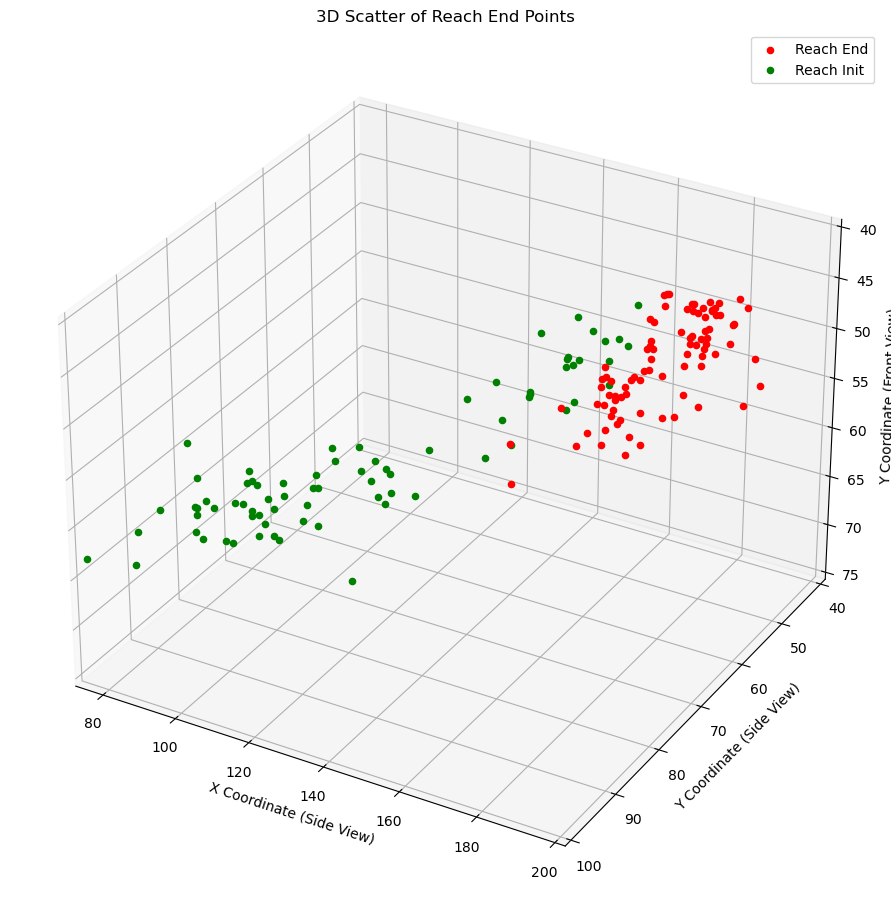

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os  # Import os for directory handling

# Function to plot overlaid reaches as 3D scatter points with initiation location toggle and axis limit control
def plot_3D_reach_endpoints(df, reach_range, 
                          x_side, y_side, pellet_x_side, pellet_y_side, 
                          x_front, y_front, pellet_x_front, pellet_y_front, 
                          excluded_reaches=None, max_reach_duration=150, 
                          plot_initiation=False,  # Toggle for initiation location
                          file_path=None, show_legend=False, use_reach_end=False, save_fig=True,
                          xlim=None, ylim=None, zlim=None):  # Add xlim, ylim, zlim parameters
    
    # Create the 3D plot
    fig = plt.figure(figsize=(12, 9), constrained_layout=True)  # Increased size, use constrained_layout
    ax_3d = fig.add_subplot(111, projection='3d')  # 3D plot

    # Check if file_path exists and create it if not
    if save_fig and file_path:
        os.makedirs(file_path, exist_ok=True)
    
    # Flags to ensure the labels are added only once
    reach_end_label_added = False
    reach_init_label_added = False

    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        reach_num = df['reach_number'][i]
        
        # Check if the reach is in the excluded_reaches list
        if excluded_reaches and reach_num in excluded_reaches:
            print(f"Excluding reach {reach_num}")
            continue

        # Extract relevant frame values
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]

        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)

        # Skip if end_frame is less than start_frame
        if end_frame < start_frame:
            print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
            continue

        # Check if the reach duration exceeds the max_reach_duration
        if end_frame - start_frame > max_reach_duration:
            print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
            continue

        # Use end_point to plot only the final frame (either end_frame or max_frame based on flag)
        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame

        # Plot a 3D scatter point for the reach endpoint
        ax_3d.scatter(x_side[end_point], y_side[end_point], y_front[end_point], color='r', marker='o', 
                      label='Reach End' if not reach_end_label_added else "")
        reach_end_label_added = True

        # If plot_initiation is enabled, plot the initiation point as well
        if plot_initiation:
            ax_3d.scatter(x_side[start_frame], y_side[start_frame], y_front[start_frame], color='g', marker='o', 
                          label='Reach Init' if not reach_init_label_added else "")
            reach_init_label_added = True

    # Mark the pellet location in 3D space
    # ax_3d.scatter(pellet_x_side, pellet_y_side, pellet_y_front, c='r', marker='x', s=100, label='Pellet')

    # Set labels for the 3D plot
    ax_3d.set_xlabel('X Coordinate (Side View)')
    ax_3d.set_ylabel('Y Coordinate (Side View)')
    ax_3d.set_zlabel('Y Coordinate (Front View)')
    ax_3d.set_title('3D Scatter of Reach End Points')

    # Apply axis limits if provided
    if xlim:
        ax_3d.set_xlim(xlim)
    if ylim:
        ax_3d.set_ylim(ylim)
    if zlim:
        ax_3d.set_zlim(zlim)

    # Invert axes to change the direction of the plot
    # ax_3d.invert_xaxis()  # Invert X-axis
    ax_3d.invert_yaxis()  # Invert Y-axis
    ax_3d.invert_zaxis()  # Invert Z-axis (optional if needed)

    # Add a legend if needed
    if show_legend:
        ax_3d.legend()

    # Save the figure if save_fig is True, using bbox_inches="tight" to avoid cutting
    if save_fig and file_path:
        plt.savefig(f"{file_path}/3D_reach_endpoints_{reach_range[0]}_to_{reach_range[1]}.png", bbox_inches="tight")
    
    # Show or close the figure to prevent display in Jupyter
    plt.show()

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot 3D scatter of reach end points with initiation toggle

df_curate_plotting = df_curate[:149]
save_plots_path = r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\reaching\3D_scatter'

# Define the range of reaches to plot (e.g., reaches 1 to 149)
reach_range = (1, 149)  # Adjust this range as needed

# Define reaches to exclude (example)
excluded_reaches = [1, 4, 5, 13, 16, 19, 31, 32, 42, 44, 48, 59, 64, 70, 71, 73, 74, 76, 77, 79, 82, 84, 85, 87, 88, 90, 91, 98, 99, 100, 103, 104, 106, 107, 108, 109, 114, 115, 118, 125, 127, 128, 129, 130, 133, 137, 141, 142, 143, 144, 148, 149]

# Define custom axis limits
x_limits = (75, 200)  # Example X-axis limits
y_limits = (40, 100)   # Example Y-axis limits
z_limits = (40, 75)   # Example Z-axis limits

# Call the function to plot the 3D scatter of reach end points, with initiation points toggled on
plot_3D_reach_endpoints(df_curate_plotting, reach_range, 
                        x_side, y_side, pellet_x_side, pellet_y_side, 
                        x_front, y_front, pellet_x_front, pellet_y_front, 
                        excluded_reaches=excluded_reaches, max_reach_duration=150, 
                        plot_initiation=True,  # Toggle for initiation points
                        file_path=save_plots_path, show_legend=True, save_fig=True,
                        xlim=x_limits,ylim=y_limits,zlim=z_limits)  # Pass axis limits


Excluding reach 1
Excluding reach 4
Excluding reach 5
Skipping reach 9 due to long duration (25025 frames)
Skipping reach 10 due to long duration (27054 frames)
Excluding reach 13
Excluding reach 16
Excluding reach 19
Skipping reach 21 due to invalid frame range (start_frame: 45945, end_frame: 0)
Skipping reach 27 due to invalid frame range (start_frame: 65066, end_frame: 0)
Excluding reach 31
Excluding reach 32
Skipping reach 36 due to invalid frame range (start_frame: 81947, end_frame: 0)
Excluding reach 42
Excluding reach 44
Excluding reach 48
Excluding reach 59
Excluding reach 64
Excluding reach 70
Excluding reach 71
Excluding reach 73
Excluding reach 74
Excluding reach 76
Excluding reach 77
Excluding reach 79
Excluding reach 82
Excluding reach 84
Excluding reach 85
Excluding reach 87
Excluding reach 88
Skipping reach 89 due to invalid frame range (start_frame: 240807, end_frame: 0)
Excluding reach 90
Excluding reach 91
Excluding reach 98
Excluding reach 99
Excluding reach 100
Excl

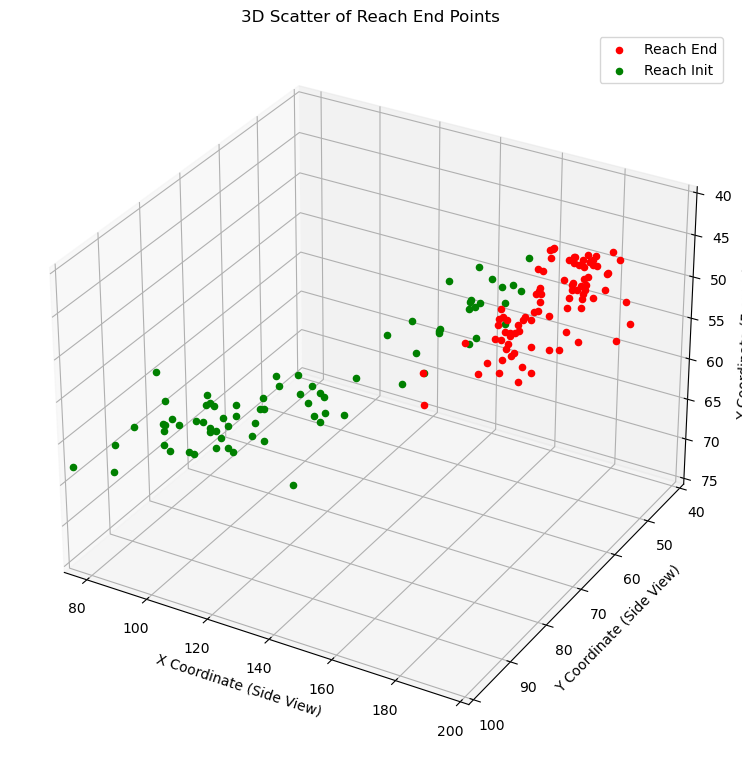

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os  # Import os for directory handling

# Function to plot overlaid reaches as 3D scatter points with initiation location toggle and axis limit control
def plot_3D_reach_endpoints(df, reach_range, 
                          x_side, y_side, pellet_x_side, pellet_y_side, 
                          x_front, y_front, pellet_x_front, pellet_y_front, 
                          excluded_reaches=None, max_reach_duration=150, 
                          plot_initiation=False,  # Toggle for initiation location
                          file_path=None, show_legend=False, use_reach_end=False, save_fig=True,
                          xlim=None, ylim=None, zlim=None):  # Add xlim, ylim, zlim parameters
    
    # Create the 3D plot
    fig = plt.figure(figsize=(12, 9))  # Increased size, no constrained_layout
    ax_3d = fig.add_subplot(111, projection='3d')  # 3D plot

    # Check if file_path exists and create it if not
    if save_fig and file_path:
        os.makedirs(file_path, exist_ok=True)
    
    # Flags to ensure the labels are added only once
    reach_end_label_added = False
    reach_init_label_added = False

    # Loop through each reach in the specified range
    for i in range(reach_range[0] - 1, reach_range[1]):
        reach_num = df['reach_number'][i]
        
        # Check if the reach is in the excluded_reaches list
        if excluded_reaches and reach_num in excluded_reaches:
            print(f"Excluding reach {reach_num}")
            continue

        # Extract relevant frame values
        start_frame = df['reachInit'][i]
        max_frame = df['reachMax'][i]
        end_frame = df['reachEnd'][i]
        end_type = df['behaviors'][i]

        # Convert to integers
        start_frame = int(start_frame)
        max_frame = int(max_frame)
        end_frame = int(end_frame)

        # Skip if end_frame is less than start_frame
        if end_frame < start_frame:
            print(f"Skipping reach {reach_num} due to invalid frame range (start_frame: {start_frame}, end_frame: {end_frame})")
            continue

        # Check if the reach duration exceeds the max_reach_duration
        if end_frame - start_frame > max_reach_duration:
            print(f"Skipping reach {reach_num} due to long duration ({end_frame - start_frame} frames)")
            continue

        # Use end_point to plot only the final frame (either end_frame or max_frame based on flag)
        if use_reach_end:
            end_point = end_frame
        else:
            end_point = max_frame

        # Plot a 3D scatter point for the reach endpoint
        ax_3d.scatter(x_side[end_point], y_side[end_point], y_front[end_point], color='r', marker='o', 
                      label='Reach End' if not reach_end_label_added else "")
        reach_end_label_added = True

        # If plot_initiation is enabled, plot the initiation point as well
        if plot_initiation:
            ax_3d.scatter(x_side[start_frame], y_side[start_frame], y_front[start_frame], color='g', marker='o', 
                          label='Reach Init' if not reach_init_label_added else "")
            reach_init_label_added = True

    # Mark the pellet location in 3D space (optional, commented out)
    # ax_3d.scatter(pellet_x_side, pellet_y_side, pellet_y_front, c='r', marker='x', s=100, label='Pellet')

    # Set labels for the 3D plot
    ax_3d.set_xlabel('X Coordinate (Side View)')
    ax_3d.set_ylabel('Y Coordinate (Side View)')
    ax_3d.set_zlabel('Y Coordinate (Front View)')
    ax_3d.set_title('3D Scatter of Reach End Points')

    # Apply axis limits if provided
    if xlim:
        ax_3d.set_xlim(xlim)
    if ylim:
        ax_3d.set_ylim(ylim)
    if zlim:
        ax_3d.set_zlim(zlim)

    # Invert axes to change the direction of the plot
    # ax_3d.invert_xaxis()  # Invert X-axis
    ax_3d.invert_yaxis()  # Invert Y-axis
    ax_3d.invert_zaxis()  # Invert Z-axis (optional if needed)

    # Add a legend if needed
    if show_legend:
        ax_3d.legend()

    # Adjust the layout to prevent the z-axis label from getting cut off
    plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

    # Save the figure if save_fig is True, using bbox_inches="tight" to avoid cutting
    if save_fig and file_path:
        plt.savefig(f"{file_path}/3D_reach_endpoints_{reach_range[0]}_to_{reach_range[1]}.png", bbox_inches="tight")
    
    # Show or close the figure to prevent display in Jupyter
    plt.show()

#-----------------------------------------------------------------------------------------------------------
# Use the updated function to plot 3D scatter of reach end points with initiation toggle

df_curate_plotting = df_curate[:149]
save_plots_path = r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\reaching\3D_scatter'

# Define the range of reaches to plot (e.g., reaches 1 to 149)
reach_range = (1, 149)  # Adjust this range as needed

# Define reaches to exclude (example)
excluded_reaches = [1, 4, 5, 13, 16, 19, 31, 32, 42, 44, 48, 59, 64, 70, 71, 73, 74, 76, 77, 79, 82, 84, 85, 87, 88, 90, 91, 98, 99, 100, 103, 104, 106, 107, 108, 109, 114, 115, 118, 125, 127, 128, 129, 130, 133, 137, 141, 142, 143, 144, 148, 149]

# Define custom axis limits
x_limits = (75, 200)  # Example X-axis limits
y_limits = (40, 100)   # Example Y-axis limits
z_limits = (40, 75)   # Example Z-axis limits

# Call the function to plot the 3D scatter of reach end points, with initiation points toggled on
plot_3D_reach_endpoints(df_curate_plotting, reach_range, 
                        x_side, y_side, pellet_x_side, pellet_y_side, 
                        x_front, y_front, pellet_x_front, pellet_y_front, 
                        excluded_reaches=excluded_reaches, max_reach_duration=150, 
                        plot_initiation=True,  # Toggle for initiation points
                        file_path=save_plots_path, show_legend=True, save_fig=True,
                        xlim=x_limits, ylim=y_limits, zlim=z_limits)  # Pass axis limits
